<a href="https://colab.research.google.com/github/guptaharsh-in/MACD_Strategy_using_Python/blob/main/MACD_Strategy_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# MACD (Moving Average Convergence Divergence) Crossover Strategy to determine when to Buy and Sell

In [73]:
#Install library nsepy if necessary
#pip install nsepy


In [74]:
# Import Other Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import nsepy as nse

In [75]:
# Load and Store Data from National Stock Exchange(NSE)
data = nse.get_history("RELIANCE", start = date(2022,6,1), end = date(2023,1,1), index=False)

In [76]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2022-06-01,RELIANCE,EQ,2632.65,2634.30,2655.20,2616.20,2635.00,2633.50,2638.15,4512079,1.190354e+15,165071,2072536,0.4593
2022-06-02,RELIANCE,EQ,2633.50,2634.00,2732.45,2634.00,2728.30,2724.30,2701.30,10211408,2.758410e+15,297958,4788206,0.4689
2022-06-03,RELIANCE,EQ,2724.30,2744.00,2817.35,2742.00,2778.00,2779.50,2793.34,11048210,3.086145e+15,353834,5136072,0.4649
2022-06-06,RELIANCE,EQ,2779.50,2780.00,2814.00,2751.80,2766.25,2767.55,2775.79,5119488,1.421060e+15,217253,1680712,0.3283
2022-06-07,RELIANCE,EQ,2767.55,2769.90,2791.10,2752.05,2767.05,2772.75,2773.03,5703333,1.581549e+15,232290,2712556,0.4756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,RELIANCE,EQ,2502.20,2514.75,2542.00,2492.40,2525.00,2524.05,2523.81,2764496,6.977059e+14,117927,1225057,0.4431
2022-12-27,RELIANCE,EQ,2524.05,2530.00,2548.80,2515.25,2542.70,2544.70,2534.62,2659749,6.741453e+14,138609,1246382,0.4686
2022-12-28,RELIANCE,EQ,2544.70,2538.00,2549.80,2521.50,2542.00,2544.45,2537.68,3442509,8.735979e+14,158888,1908597,0.5544


In [77]:
# Convert to Dataframe
data = data.Close.to_frame().dropna()
data

,Close
Date,
2022-06-01,2633.50
2022-06-02,2724.30
2022-06-03,2779.50
2022-06-06,2767.55
2022-06-07,2772.75
...,...
2022-12-26,2524.05
2022-12-27,2544.70
2022-12-28,2544.45


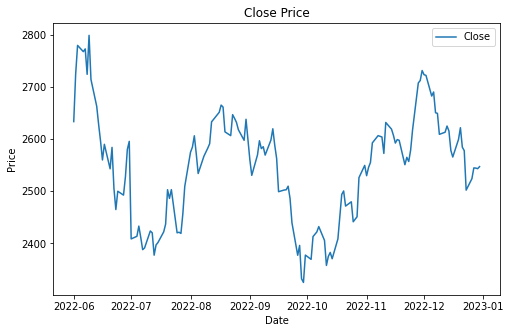

In [78]:
data.plot(figsize= (8,5),ylabel = "Price", title= "Close Price")

In [79]:
# Calculate Short and Long Exponential Moving Averages
#
data["ema_s"] = data.Close.ewm(span =12, adjust = False).mean()
data["ema_l"] = data.Close.ewm(span =26, adjust = False).mean()

# Calculate MACD and Signal Line Indicator
data["MACD"] =  data["ema_s"] - data["ema_l"]
data["Signal"] =  data["MACD"].ewm(span =9, adjust = False).mean()
data


,Close,ema_s,ema_l,MACD,Signal
Date,,,,,
2022-06-01,2633.50,2633.500000,2633.500000,0.000000,0.000000
2022-06-02,2724.30,2647.469231,2640.225926,7.243305,1.448661
2022-06-03,2779.50,2667.781657,2650.542524,17.239133,4.606755
2022-06-06,2767.55,2683.130633,2659.209744,23.920888,8.469582
2022-06-07,2772.75,2696.918228,2667.620134,29.298094,12.635284
...,...,...,...,...,...
2022-12-26,2524.05,2580.889336,2595.552676,-14.663340,2.040595
2022-12-27,2544.70,2575.321746,2591.785811,-16.464065,-1.660337
2022-12-28,2544.45,2570.572246,2588.279455,-17.707208,-4.869711


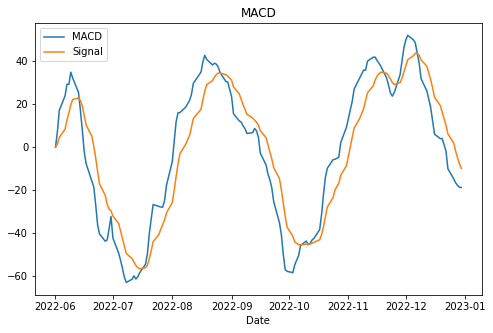

In [80]:
data[["MACD", "Signal"]].plot(figsize= (8,5), title= "MACD")

In [81]:
# Create a Function to signal when to Buy and Sell
def buy_sell(data):
  sigbuy =[]
  sigsell =[]
  flag = -1

  for i in range(len(data)):
    if data["MACD"][i]>data["Signal"][i]:
      sigsell.append(np.nan)
      if flag!= 1:
        sigbuy.append(data["Close"][i])
        flag= 1
      else:
        sigbuy.append(np.nan)

    elif data["MACD"][i]<data["Signal"][i]:
      sigbuy.append(np.nan)
      if flag!= 0:
        sigsell.append(data["Close"][i])
        flag= 0
      else:
        sigsell.append(np.nan)

    else:
        sigbuy.append(np.nan)
        sigsell.append(np.nan)

  return (sigbuy,sigsell)


In [82]:
# Store Buy and Sell in a Variable
buy_sell= buy_sell(data)
data["buy_signal"] = buy_sell[0]
data["sell_signal"] = buy_sell[1]

In [83]:
data

,Close,ema_s,ema_l,MACD,Signal,buy_signal,sell_signal
Date,,,,,,,
2022-06-01,2633.50,2633.500000,2633.500000,0.000000,0.000000,NaN,NaN
2022-06-02,2724.30,2647.469231,2640.225926,7.243305,1.448661,2724.3,NaN
2022-06-03,2779.50,2667.781657,2650.542524,17.239133,4.606755,NaN,NaN
2022-06-06,2767.55,2683.130633,2659.209744,23.920888,8.469582,NaN,NaN
2022-06-07,2772.75,2696.918228,2667.620134,29.298094,12.635284,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-26,2524.05,2580.889336,2595.552676,-14.663340,2.040595,NaN,NaN
2022-12-27,2544.70,2575.321746,2591.785811,-16.464065,-1.660337,NaN,NaN
2022-12-28,2544.45,2570.572246,2588.279455,-17.707208,-4.869711,NaN,NaN


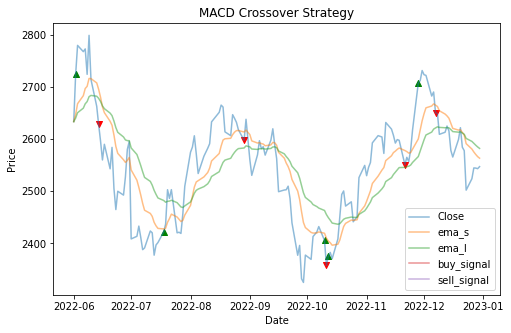

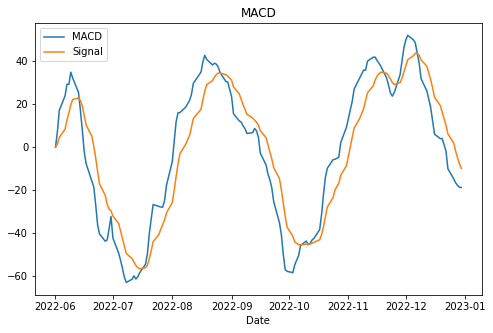

In [85]:
# Visualize the Strategy
%matplotlib inline
data[["Close","ema_s","ema_l","buy_signal","sell_signal"]].plot(figsize= (8,5), ylabel= "Price", title = "MACD Crossover Strategy",alpha= .5)
plt.scatter(data.index, data["buy_signal"], label = "Buy", marker = "^", color = "green")
plt.scatter(data.index, data["sell_signal"], label = "Sell", marker = "v", color = "red")

data[["MACD", "Signal"]].plot(figsize= (8,5), title= "MACD")

